# Forest Cover Type Classification

## Name - Rohan Subhash Yewale
## NUID - 001087414

# Abstract

Forest Cover type dataset in the UCI Machine Learning Repository that takes forestry data from four wilderness areas in Roosevelt National Forest in northern Colorado. The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data:<br/>

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from cartographic variables. The seven types are:

* Spruce/Fir
* Lodgepole Pine
* Ponderosa Pine
* Cottonwood/Willow
* Aspen
* Douglas-fir
* Krummholz

<img src="Images/forest_cover_type.jpg">


Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

### Data 
* In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).
* The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.
<br/>link - https://www.kaggle.com/c/forest-cover-type-prediction/data



* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1 - Rawah Wilderness Area<br/>
2 - Neota Wilderness Area<br/>
3 - Comanche Peak Wilderness Area<br/>
4 - Cache la Poudre Wilderness Area<br/>




## Loading Packages

In [1]:
!pip install seaborn

In [98]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
from matplotlib import pyplot as plt
# to include graphs inline within the frontends next to code
import seaborn as sns

# preprocessing functions and evaluation models
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

## Loading Training and Test Data

In [99]:
url = 'https://raw.githubusercontent.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/master/Assignment2_Kaggle_Competition/Dataset/train.csv'
train = pd.read_csv(url)
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [100]:
url = 'https://raw.githubusercontent.com/rhnyewale/INFO-7390-Advance-Data-Science-Architecture/master/Assignment2_Kaggle_Competition/Dataset/test.csv'
test = pd.read_csv(url)
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Data Statistics

In [101]:
train.shape

(15120, 56)

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [103]:
train.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,1282,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,914,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [104]:
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

There is no null data in the train dataset<br/>
Wilderness_Area and Soil_Type are categorical variable and one hot encoded<br/>

In [105]:
pd.set_option('display.max_columns', None) #to view max columns
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

As we can see Soil_Type7 and Soil_Type15 are constant and have all the statistics as 0.
We can drop these 2 columns.

In [106]:
train.nunique()

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [107]:
train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


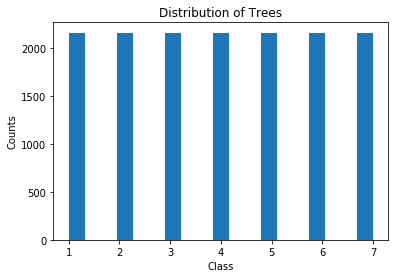

In [108]:
# Plot distribution of target classes
plt.hist(train['Cover_Type'], bins='auto')
plt.title('Distribution of Trees')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.show()

In [109]:
train['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

Distribution of trees shows perfect uniform distribution.

Here are the 7 types of the trees, numbered from 1 to 7 in the Cover_Type column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

Observations:

* Train dataset has 15120 rows and 56 columns.
* Each column has numeric (integer/float) datatype.
* There are no NA in the dataset.Thus dataset is properly formatted.
* Wilderness_Area and Soil_Type are one hot encoded
* Cover_Type is our label/target column.

## Outliers

In [110]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count


In [111]:
# loop through all columns to see if there are any outliers
for i in train.columns:
    if outlier_function(train, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, i)[2], i))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

We will take closer look to below 4 columns:

* Horizontal_Distance_To_Hydrology
* Vertical_Distance_To_Hydrology
* Horizontal_Distance_To_Roadways
* Horizontal_Distance_To_Fire_Points

We are not going to consider other columns for potential outlier elimination because their data range is already fixed between 0 and 255 (e.g. Hillshade columns) or they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas).

Data ranges of those 4 columns:

* Horizontal_Distance_To_Hydrology: 0, 1343
* Vertical_Distance_To_Hydrology: -146, 554
* Horizontal_Distance_To_Roadways: 0, 6890
* Horizaontal_Distance_To_Firepoints: 0, 6993

Horizaontal_Distance_To_Fire_points having the highest number of outliers and widest data range.





In [112]:
trees = train[(train['Horizontal_Distance_To_Fire_Points'] > outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train['Horizontal_Distance_To_Fire_Points'] < outlier_function(train, 'Horizontal_Distance_To_Fire_Points')[1])]
trees.shape

(14988, 56)

# Exploratory Data Analysis

Checking If Wilderness Area and Soil Type are binary or not?

In [113]:
size=10
Uni = []
for i in range(size+1,len(train.columns)-1):
    Uni.append(pd.unique(train[train.columns[i]].values))


In [76]:
Uni

[array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype

Yes, Wilderness Areas and Soil Types have binary values.

Check if Tree belong to multiple soil types and wilderness areas ?

In [114]:
train.iloc[:,11:15].sum(axis=1).sum()

15120

In [115]:
train.iloc[:,15:55].sum(axis=1).sum()

15120

Wilderness_Area and Soil_Type1-40 having only binary values and only one soil_type out of 40 soil types or wilderness_area out of 4 types being equal to 1, shows that they are one-hot-encoded columns.

One important thing about trees, they can only belong to one soil type or one wilderness area.



Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

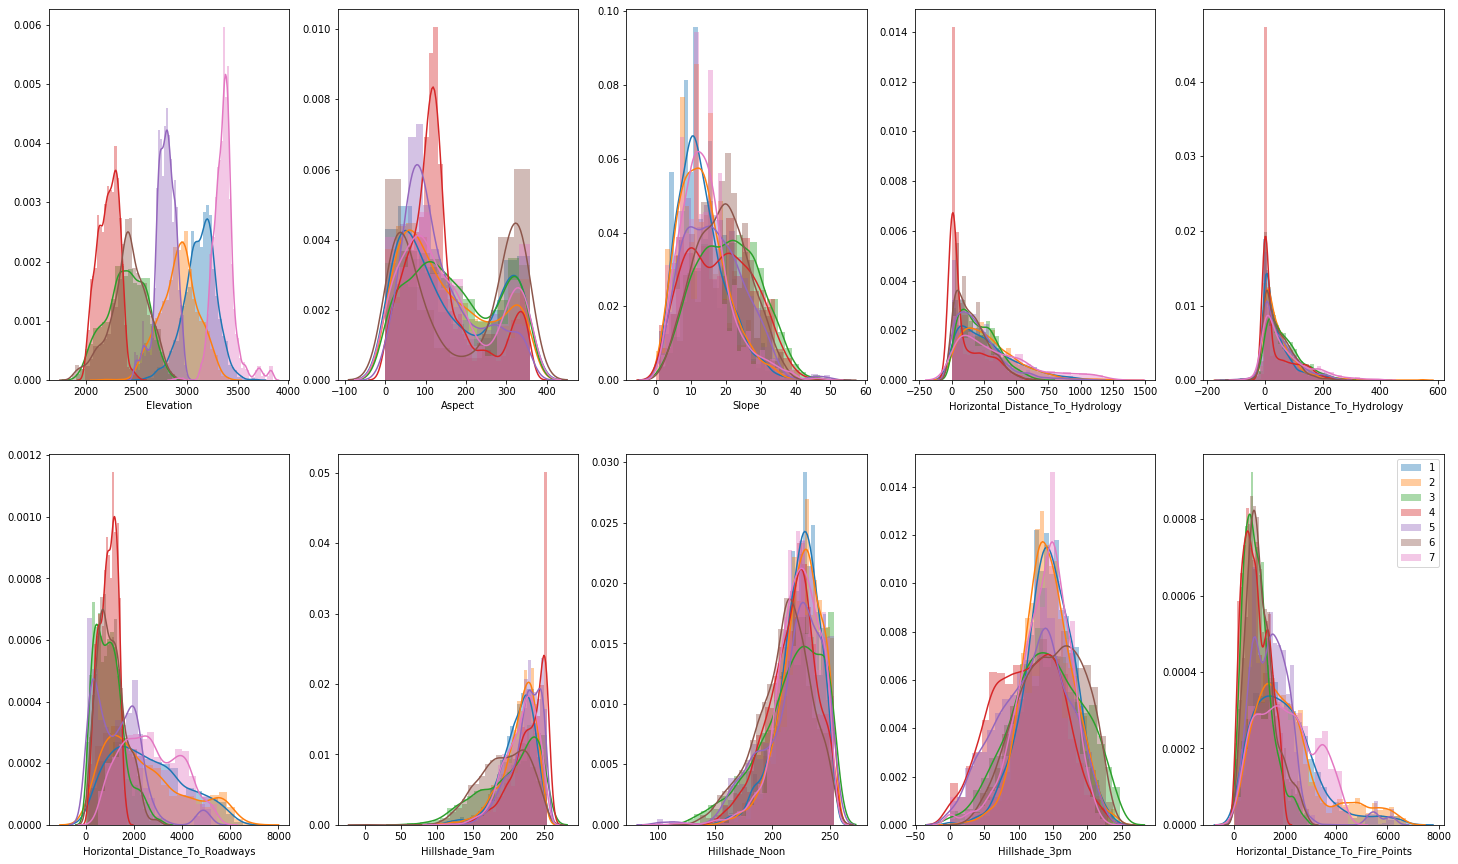

In [79]:
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,15))
g= sns.FacetGrid(train, hue='Cover_Type',height=5)
(g.map(sns.distplot,train.columns[1],ax=axes[0][0]))
(g.map(sns.distplot, train.columns[2],ax=axes[0][1]))
(g.map(sns.distplot, train.columns[3],ax=axes[0][2]))
(g.map(sns.distplot, train.columns[4],ax=axes[0][3]))
(g.map(sns.distplot, train.columns[5],ax=axes[0][4]))
(g.map(sns.distplot, train.columns[6],ax=axes[1][0]))
(g.map(sns.distplot, train.columns[7],ax=axes[1][1]))
(g.map(sns.distplot, train.columns[8],ax=axes[1][2]))
(g.map(sns.distplot, train.columns[9],ax=axes[1][3]))
(g.map(sns.distplot, train.columns[10],ax=axes[1][4]))
plt.close(2)
plt.legend()

Looking at distribution plots above, it is observed that distribution of numerical variables is not normal. Some of them are right skewed and some of them are left skewed. Distribution of Aspects seems like binary.

In conclusion, we have to scale our numerical variables before they go in model.

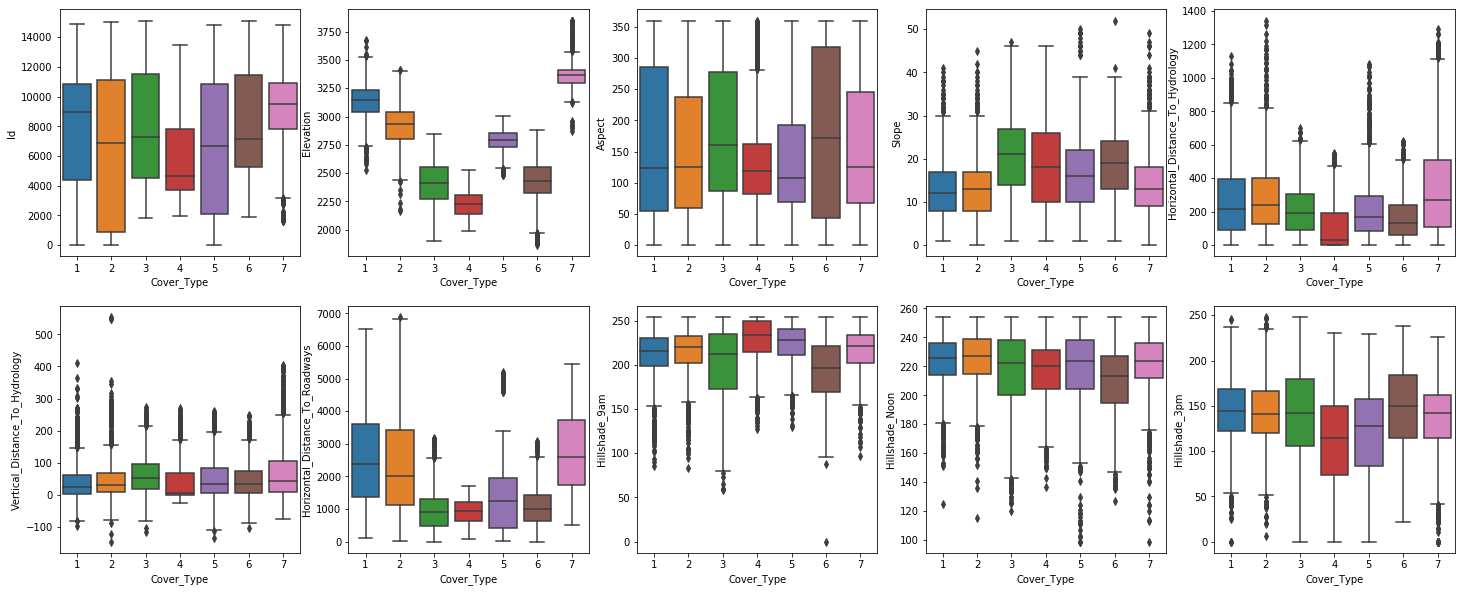

In [116]:
size=10
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,10))
for i in range(0,size):
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    sns.boxplot(x="Cover_Type", y=train.columns[i], data=train,ax=ax_curr);

Observations:

* Forest "Cover_Type" 1 and 7 have higher "Elevation" than others while 4 has lowest among the all.
* All Forest "Cover_Type" are spreded out in "Aspect".
* Forest Cover Type 1, 2 and 7 have higher Horizontal_Distance_To_Roadways.
* There is not much variation in distribution of Forest Cover Type for each of the other features.
* Other features have almost same level of distribution of Forest Cover Types.

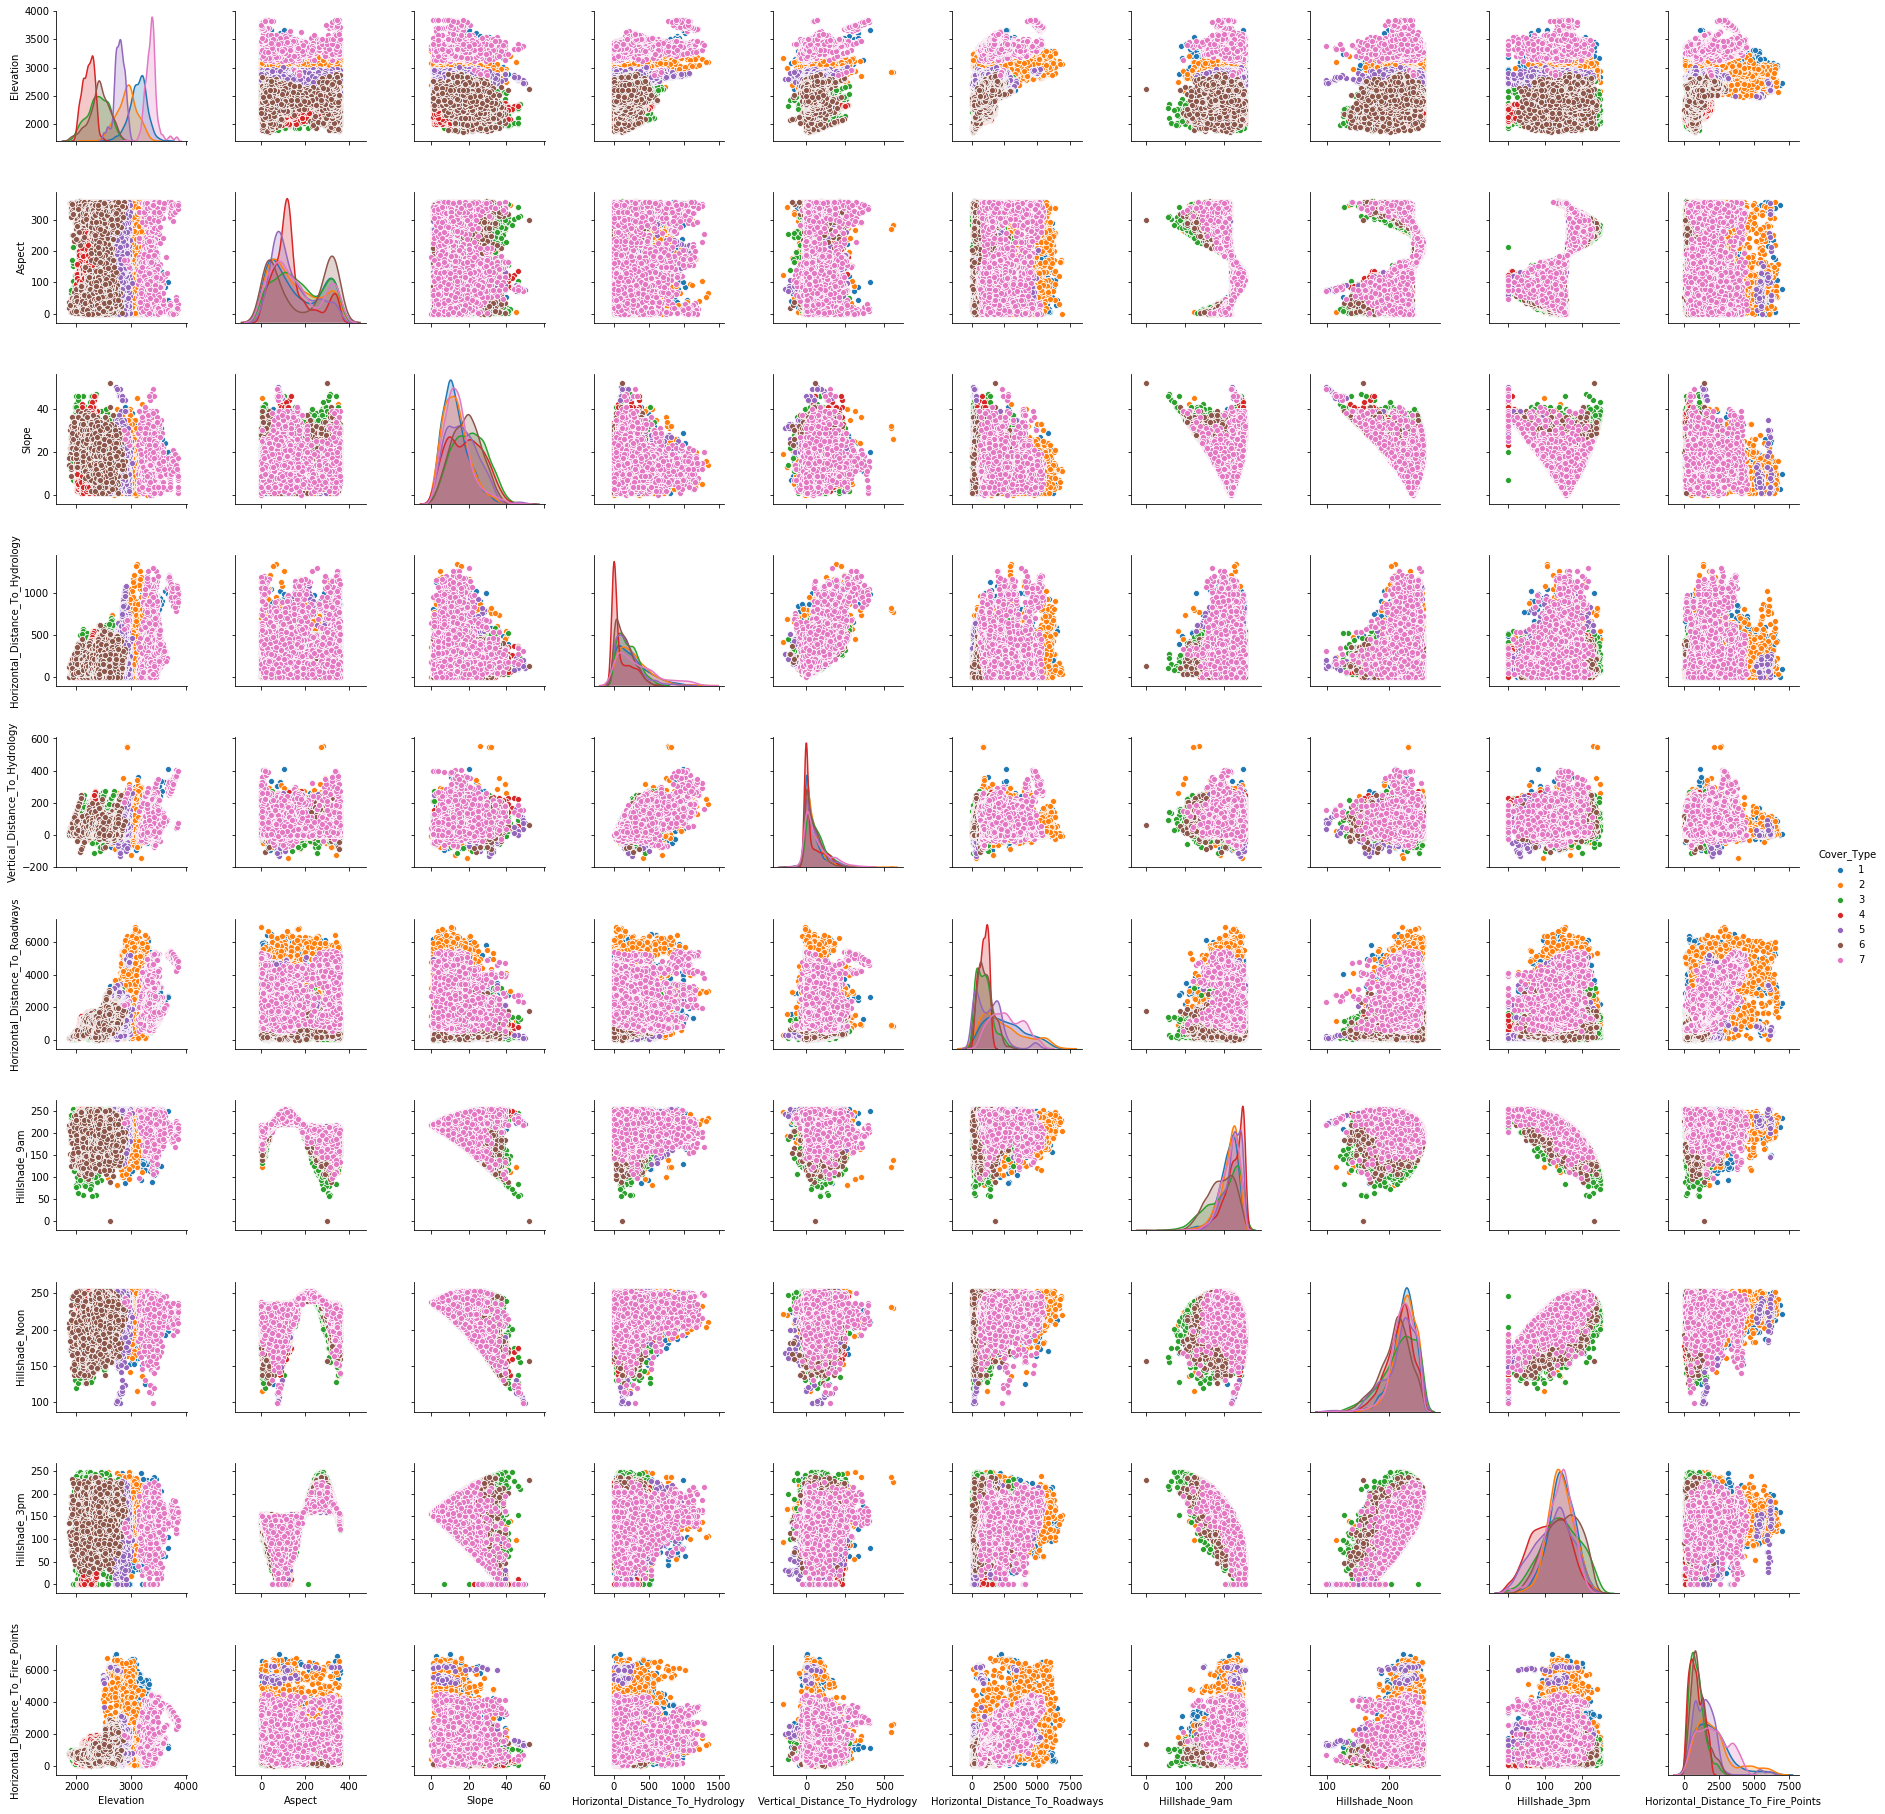

In [117]:
sns.pairplot(train, hue='Cover_Type', vars=train.columns[1:11])

Observations:

* Hillshade patterns give a nice ellipsoid patterns with each other
* Aspect and Hillshades attributes form a sigmoid pattern
* Horizontal and vertical distance to hydrology give an almost linear pattern.

In [118]:
# Bivariate EDA
pd.crosstab(train.Soil_Type31, train.Cover_Type)

Cover_Type,1,2,3,4,5,6,7
Soil_Type31,,,,,,,
0,2046,2063,2160,2160,2073,2153,2133
1,114,97,0,0,87,7,27


In [119]:
#Convert dummy features back to categorical
x = train.iloc[:,15:55]
y = train.iloc[:,11:15]
y = pd.DataFrame(y)
x = pd.DataFrame(x)
s2 = pd.Series(x.columns[np.where(x!=0)[1]])
s3 = pd.Series(y.columns[np.where(y!=0)[1]])
train['soil_type'] = s2
train['Wilderness_Area'] = s3
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,soil_type,Wilderness_Area
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Soil_Type12,Wilderness_Area1
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,Soil_Type30,Wilderness_Area1
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1


In [120]:
# Create a new dataset exluding dummies variable for Mutivariate EDA
df_viz = train.iloc[:, 0:15]
df_viz = df_viz.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 
                      'Wilderness_Area4'], axis = 1)
df_viz.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,1,2596,51,3,258,0,510,221,232,148,6279
1,2,2590,56,2,212,-6,390,220,235,151,6225
2,3,2804,139,9,268,65,3180,234,238,135,6121
3,4,2785,155,18,242,118,3090,238,238,122,6211
4,5,2595,45,2,153,-1,391,220,234,150,6172


<Figure size 1080x720 with 0 Axes>

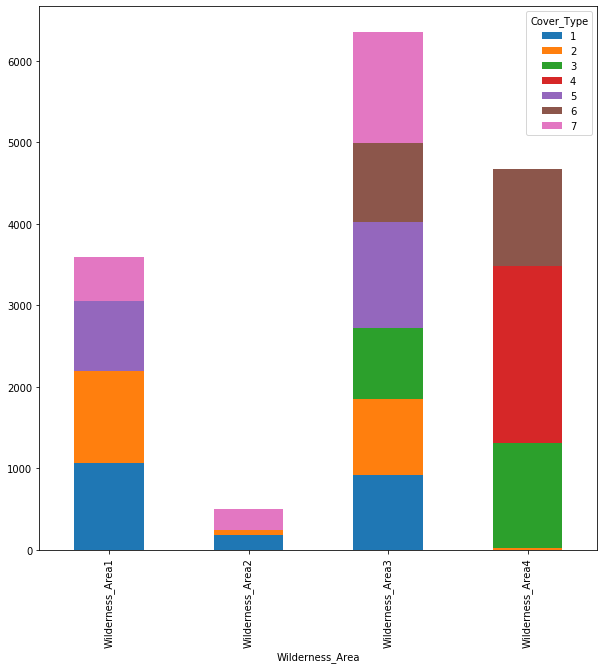

In [121]:
plt.figure(figsize=(15,10))
pd.crosstab(train.Wilderness_Area, train.Cover_Type).plot.bar(figsize=(10,10),stacked = True)

Cover Type:<br/>

1 - Spruce/Fir<br/>
2 - Lodgepole Pine<br/>
3 - Ponderosa Pine<br/>
4 - Cottonwood/Willow<br/>
5 - Aspen<br/>
6 - Douglas-fir<br/>
7 - Krummholz<br/>

The wilderness areas are:

1 - Rawah Wilderness Area<br/>
2 - Neota Wilderness Area<br/>
3 - Comanche Peak Wilderness Area<br/>
4 - Cache la Poudre Wilderness Area<br/>

Observations:

* Wilderness Area 1 has Forest Cover 1,2,5 and 7
* Wilderness Area 2 is very rare compared to other types and is observed in Cover Type 1 and 7 mainly.
* Wilderness Area 3 is observed in all Cover Types except cover type 4.
* Wilderness Area 4 is mainly obeserved in Cover Type 3, 4 and 6.
* All Forest Cover Type 4 have Wilderness Area 4 only


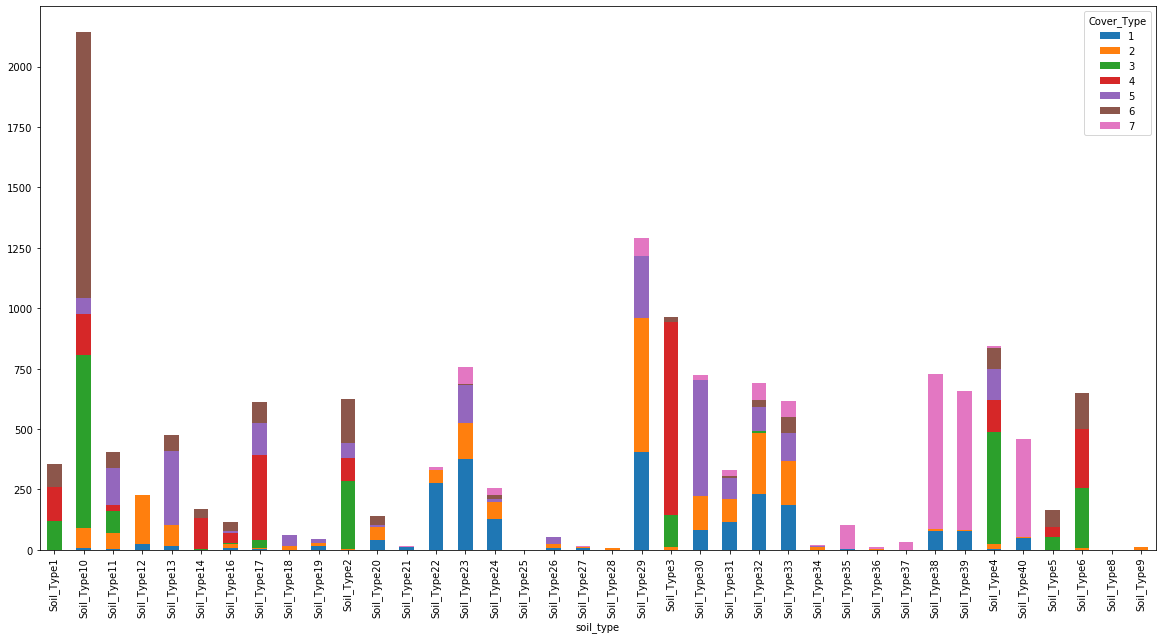

In [122]:
#plt.figure(figsize=(30,30))
pd.crosstab(train.soil_type, train.Cover_Type).plot.bar(figsize=(20,10),stacked = True)

Observations:

* Soil Type 18,19,21,25,26,27,28,34,36,37,8 and 9 are vary rarely oberved
* Soil 10 is observed maximum number of times (>2200 occurences)
* Soil types in Cover Type 3 anad cover type 6 are similar. Look at the Brown and Green bar from the graph
* Soil types in Cover Type 1 and 2 are similar. Look at orange and blue bars

## Data Correlation

Text(0.5, 1, 'Pearson Correlation of Numeric Features')

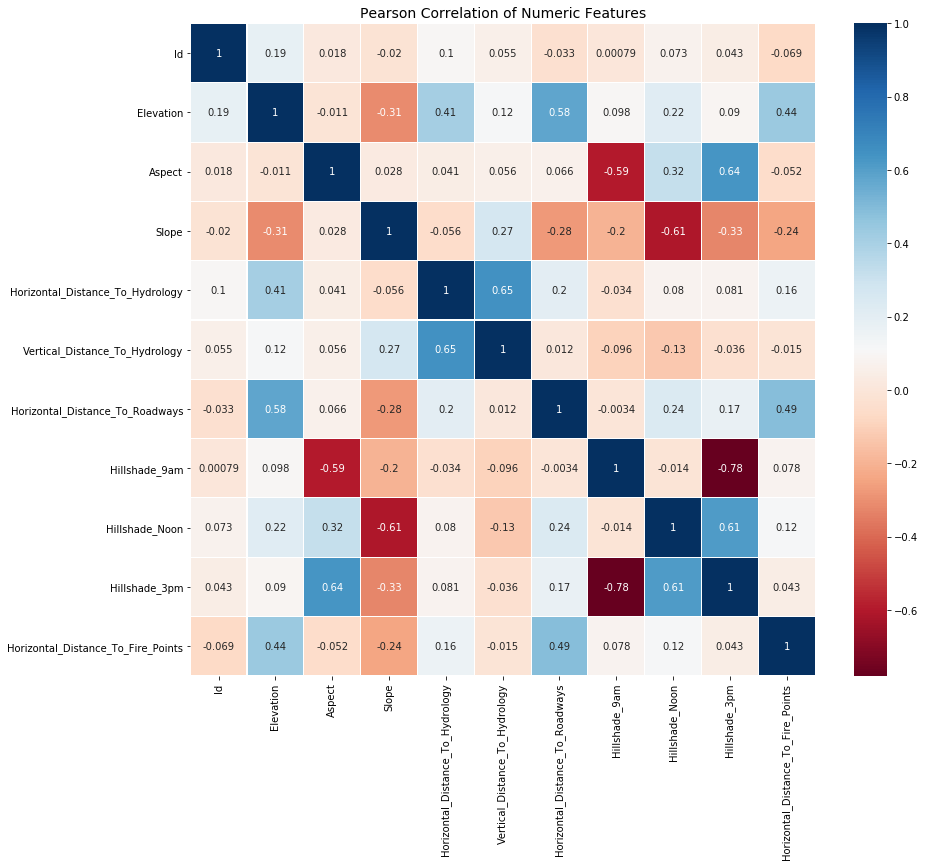

In [123]:
corr = df_viz.corr()

# plot the heatmap
plt.figure(figsize=(14,12))
colormap = plt.cm.RdBu
sns.heatmap(corr,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Numeric Features', size=14)

There are some correlation pairs with strong negative and positive correlations. The darker the color, more the correlation

In [124]:
trees.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
11,12,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
14,15,2503,157,4,67,4,674,224,240,151,5600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
15,16,2495,51,7,42,2,752,224,225,137,5576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
17,18,2517,72,7,85,6,595,228,227,133,5607,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
18,19,2504,0,4,95,5,691,214,232,156,5572,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


# Feature Engineering


**Linear combination** :
     * Elevation, Vertical dist. to Hydrology
     * Horizontal dist. to Hydrology, Horizontal dist. to Fire Points 
     * Horizontal dist. to Hydrology, Horizontal dist. to Roadways 
     * Horizontal dist. to Fire Points, Horizontal dist. to Roadways 
**Euclidean distance** : 
     * Horizontal dist. to Hydrology, Vertical dist. to Hydrology
     * euclidean distance = \sqrt{(verticaldistance)^2 + (horizontaldistance)^2}\] 

In [125]:
train=trees

In [170]:
def add_feature(data):   
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
    data['Distance_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    data['Mean_Amenities']=(data.Horizontal_Distance_To_Fire_Points + data.Horizontal_Distance_To_Hydrology + data.Horizontal_Distance_To_Roadways) / 3 #feature added 
    data['Mean_Fire_Hyd']=(data.Horizontal_Distance_To_Fire_Points + data.Horizontal_Distance_To_Hydrology) / 2 #feature added
    return data

In [171]:
train = add_feature(train)
test = add_feature(test)

C:\Users\rhnye\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhnye\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rhnye\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [172]:
#X_train = train.drop(['Id','Cover_Type','soil_type','Wilderness_Area'], axis = 1)
X_train = train.drop(['Id','Cover_Type'], axis = 1)
y_train = train.Cover_Type
X_test = test.drop(['Id'], axis = 1)

# Logistics regression****

In [129]:
%%time 

lr_pipe = Pipeline(
    steps = [
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression(solver='lbfgs', n_jobs=-1))
    ]
)

lr_param_grid = {
    'classifier__C': [1, 10, 100,1000],
}


np.random.seed(1)
grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)


0.6413188817013589
{'classifier__C': 1000}
Wall time: 34.4 s


# Random Forest****

In [182]:
%%time 

rf_pipe = Pipeline(
    steps = [
        ('classifier', RandomForestClassifier(n_estimators=500))
    ]
)

param_grid = {
       'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
rf_grid_search = GridSearchCV(rf_pipe, param_grid, cv=5, refit='True', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

0.815056617658352
{'classifier__max_depth': 34, 'classifier__min_samples_leaf': 1}
Wall time: 8min 4s


In [183]:
rf_model = rf_grid_search.best_estimator_

cv_score = cross_val_score(rf_model, X_train, y_train, cv = 5)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.81120747 0.78485657 0.79586391 0.81981982 0.87687688]
Accuracy: 0.82 (+/- 0.06)


In [184]:
rf = rf_grid_search.best_estimator_.steps[0][1]

In [185]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=34, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
y_pred = rf.predict(X_test)

In [187]:
print(len(y_pred))

565892


In [188]:
from collections import Counter
Counter(y_pred)

Counter({2: 235037,
         5: 28165,
         1: 210539,
         7: 29691,
         6: 23542,
         3: 36861,
         4: 2057})

In [189]:
submission = pd.DataFrame({'Id': test.Id,
                           'Cover_Type': y_pred})
submission.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [190]:
submission.to_csv('submission2.csv', index=False)

In [191]:
feat_imp = rf.feature_importances_
feat_imp_df = pd.DataFrame({
    'feature':X_train.columns,
    'feat_imp':feat_imp
})

feat_imp_df.sort_values(by='feat_imp', ascending=False).head(10)

,feature,feat_imp
54,Ele_minus_VDtHyd,0.129422
0,Elevation,0.118881
55,Ele_plus_VDtHyd,0.093192
61,Fire_plus_Road,0.038980
63,Mean_Amenities,0.038244
60,Hydro_minus_Road,0.034079
5,Horizontal_Distance_To_Roadways,0.033899
56,Distance_to_Hydrolody,0.032603
59,Hydro_plus_Road,0.031498
62,Fire_minus_Road,0.030904


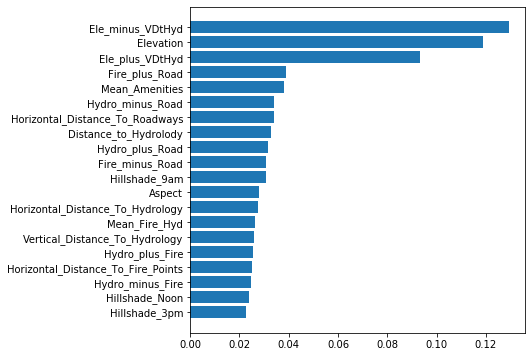

In [192]:
sorted_feat_imp_df = feat_imp_df.sort_values(by='feat_imp', ascending=True)
plt.figure(figsize=[6,6])
plt.barh(sorted_feat_imp_df.feature[-20:], sorted_feat_imp_df.feat_imp[-20:])
plt.show()

# ****ExtraTree Random Forest

In [173]:
xrf_pipe = Pipeline(
    steps = [
        ('classifier', ExtraTreesClassifier(n_estimators=500,random_state=0, criterion = 'entropy'))
    ]
)


xrf_param_grid = {
    'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
xrf_grid_search = GridSearchCV(xrf_pipe, xrf_param_grid, cv=5, refit='True', n_jobs=-1)
xrf_grid_search.fit(X_train, y_train)

print(xrf_grid_search.best_score_)
print(xrf_grid_search.best_params_)

0.8265324029833703
{'classifier__max_depth': 34, 'classifier__min_samples_leaf': 1}


In [174]:
xrf_model = xrf_grid_search.best_estimator_

cv_score = cross_val_score(xrf_model, X_train, y_train, cv = 5)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.8305537  0.79486324 0.78652435 0.83083083 0.88988989]
Accuracy: 0.83 (+/- 0.07)


In [175]:
final_model = xrf_grid_search.best_estimator_.steps[0][1]
final_model.fit(X_train, y_train)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=34, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [176]:
y_pred = final_model.predict(X_test)

In [177]:
print(len(test.Id))

565892


In [178]:
print(len(y_pred))

565892


In [179]:
from collections import Counter
Counter(y_pred)

Counter({2: 245101,
         5: 24297,
         1: 208109,
         7: 27176,
         3: 36997,
         6: 22249,
         4: 1963})

In [180]:
submission = pd.DataFrame({'Id': test.Id,
                           'Cover_Type': y_pred})
submission.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [181]:
submission.to_csv('submission.csv', index=False)

# Summary

https://github.com/nycdatasci/bootcamp004_project/blob/master/Project4-Machinelearning/Aravind_thomas/forestclassification.R

I started with EDA, Data Cleaning, Removing Data outliers from the 4 numerical columns, Understanding the correlation between  features.


I refered this kaggle notebook -https://www.kaggle.com/skillsmuggler/forest-cover-feature-engineering-and-reduction
for feature engineering and reduction.



For the first feature engineering I got the following Accuracy & Kaggle Score for Random and Extra Tree Random Forest 

Random Forest Classifier - 81% Accuracy - Kaggle Score(0.78351)

Extra Tree Random Forest - 82% Accuracy - Kaggle Score(0.81005)

I further did the analysis of the data tried Dimensionality Reduction using PCA but didn't succeed and got low Accuracy rate.
I performed Hyperparameter tuning and Implemented GridSearchCV to get the best fit for Random & Extra Tree Random Forest.
I  and added two features in feature Engineering which helped me to get better Accuracy and Kaggle Score.

Extra Tree Random Forest - 83% Accuracy - Kaggle Score(0.81361)


# Contributions Statement

* Data Statistics
* Data Cleaning & Data Outliers
* EDA - Distribution of continuous variables in Train & Test Data
* Data Correlation in continuous variables
* Model Implementation - Logistic Regression, Random Forest and Extra Tree Random Forest

# Conclusion

The forest cover dataset is an extremely knowledgeable dataset to implement multi-class classification algorithms across a wide range of methods.
The key drivers to success are creative feature engineering, effective model tuning, optimal ensembling, computational resources, and time.


Models -                   Accuracy - Kaggle Score

Logistic Regression -      64% Accuracy

Random Forest Classifier - 81% Accuracy - 0.783

Extra Tree Random Forest - 83% Accuracy - 0.813



# Citations

https://scientiaplusconscientia.wordpress.com/2014/12/16/hillshading-useful-fun-with-digital-elevation-models/
https://github.com/nycdatasci/bootcamp004_project/tree/master/Project4-Machinelearning/Aravind_thomas
https://www.kaggle.com/sharmasanthosh/exploratory-study-on-feature-selection
https://www.kaggle.com/nadare/eda-feature-engineering-and-modeling-4th-359#summary
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html


# License

Copyright 2020 Rohan Subhash Yewale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.